In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Churn_Modelling.csv')

In [2]:
#setting index as CustomerID
if df.CustomerId.nunique() == len(df):
  df.set_index('CustomerId',inplace=True)

#dropping irrelevant features
df.drop(['Surname','RowNumber'],axis=1,inplace=True)

#separating CLASSES
cat1 = [x for x in df.columns if str(df[x].dtype) == 'object']
ints = [x for x in df.columns if str(df[x].dtype) == 'int64'and df[x].nunique() > 5]
floats = [x for x in df.columns if str(df[x].dtype) == 'float64']
cat2 = [x for x in df.columns if df[x].nunique() <=5  and str(df[x].dtype) != 'object']
cols = [cat1,ints,floats,cat2]
cols

[['Geography', 'Gender'],
 ['CreditScore', 'Age', 'Tenure'],
 ['Balance', 'EstimatedSalary'],
 ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

In [ ]:
for i in cols:
  print(df[i].describe().T)

           count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457
               count      mean        std    min    25%    50%    75%    max
CreditScore  10000.0  650.5288  96.653299  350.0  584.0  652.0  718.0  850.0
Age          10000.0   38.9218  10.487806   18.0   32.0   37.0   44.0   92.0
Tenure       10000.0    5.0128   2.892174    0.0    3.0    5.0    7.0   10.0
                   count           mean           std    min       25%  \
Balance          10000.0   76485.889288  62397.405202   0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818  11.58  51002.11   

                        50%          75%        max  
Balance           97198.540  127644.2400  250898.09  
EstimatedSalary  100193.915  149388.2475  199992.48  
                  count    mean       std  min  25%  50%  75%  max
NumOfProducts   10000.0  1.5302  0.581654  1.0  1.0  1.0  2.0  4.0
HasCrCard       10000.0  0.7055  0.455840  0.0  0.0  1.0  1

## Rithim's work
data cleaning, removing noisy data, handling outliers and binning.


In [ ]:
df.isnull().sum()
#NO MISSING VALUES

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

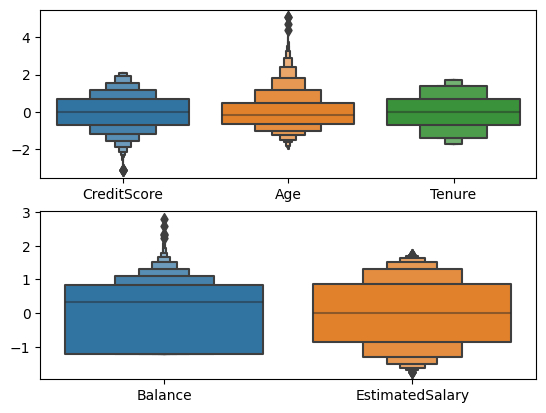

In [ ]:
#PLOTTING THE DATA TO SEARCH FOR OUTLIERS
f, (ax1,ax2) = plt.subplots(2,1)
sns.boxenplot((df[cols[1]]-df[cols[1]].mean())/df[cols[1]].std(),ax=ax1);sns.boxenplot((df[cols[2]]-df[cols[2]].mean())/df[cols[2]].std(),ax=ax2);plt.show()

We find that Age, credit score and balance has the most number of outliers. We will remove the outliers after eliminating 3 standard deviations from the mean.

Chosing to remove outliers from 3 standard deviations from the mean will result in the following values.



In [ ]:
out = df[cols[1]+cols[2]]
for i in out.columns:
  print(f"Upper limit for {i}",out[i].mean() + 3*out[i].std())
  print(f"Lower limit for {i}",out[i].mean() - 3*out[i].std())

Upper limit for CreditScore 940.488696208391
Lower limit for CreditScore 360.568903791609
Upper limit for Age 70.38521935511383
Lower limit for Age 7.458380644886169
Upper limit for Tenure 13.68932313114905
Lower limit for Tenure -3.66372313114905
Upper limit for Balance 263678.10489515786
Lower limit for Balance -110706.32631915784
Upper limit for EstimatedSalary 272621.7183340945
Lower limit for EstimatedSalary -72441.23857209449


In [ ]:
cred_out = df[(df.CreditScore < 360) | (df.CreditScore > 940)]
cred_out

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15612494,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
15685372,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
15758813,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
15692416,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
15679249,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
15803202,350,France,Male,51,10,0.00,1,1,1,125823.79,1
15765173,350,France,Female,60,3,0.00,1,0,0,113796.15,1
15668309,350,France,Female,40,0,111098.85,1,1,1,172321.21,1


In [ ]:
age_out = df[(df.Age < 7) | (df.Age > 70)]
age_out

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
15589975,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
15808473,673,France,Male,72,1,0.00,2,0,1,111981.19,0
15793726,681,France,Female,79,0,0.00,2,0,1,170968.99,0
15712287,652,France,Female,80,4,0.00,2,1,1,188603.07,0
...,...,...,...,...,...,...,...,...,...,...,...
15603111,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
15636061,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
15644103,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0


In [ ]:
df[(df.Balance < -110706) | (df.Balance > 263678)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,


In [ ]:
df = df.drop(index = age_out.index)

In [ ]:
len(df)

9867

In [ ]:

df['credit_score_tf'] = df['CreditScore'].apply(lambda x: 25*round(x/25))
df['age_tf'] = df['Age'].apply(lambda x: 5*round(x/5))
df['log10_balance'] = df['Balance'].apply(lambda x: 1/5*round(5*np.log10(x+1)))
df['log10_estimated_salary'] = df['EstimatedSalary'].apply(lambda x: 1/2*round(2*np.log10(x)))
df.drop(["EstimatedSalary","Age","CreditScore","Balance"],axis=1,inplace=True)
df

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,credit_score_tf,age_tf,log10_balance,log10_estimated_salary
CustomerId,,,,,,,,,,,
15634602,France,Female,2,1,1,1,1,625,40,0.0,5.0
15647311,Spain,Female,1,1,0,1,0,600,40,5.0,5.0
15619304,France,Female,8,3,1,0,1,500,40,5.2,5.0
15701354,France,Female,1,2,0,0,0,700,40,0.0,5.0
15737888,Spain,Female,2,1,1,1,0,850,45,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,France,Male,5,2,1,0,0,775,40,0.0,5.0
15569892,France,Male,10,1,1,1,0,525,35,4.8,5.0
15584532,France,Female,7,1,0,1,1,700,35,0.0,4.5


## Tamirra's work
Data integration, finding relationship between features, additional dataset integration and EDA.


In [ ]:
#DUMMY VARIABLE ENCODING and SCALING
st = StandardScaler()
dff = pd.get_dummies(df,columns=cols[0])


In [ ]:
dff[['credit_score_tf','age_tf', 'log10_balance', 'log10_estimated_salary']] = st.fit_transform(dff[['credit_score_tf','age_tf', 'log10_balance', 'log10_estimated_salary']])

In [ ]:
c1 = [x for x in dff.columns if str(dff[x].dtype) == 'int64']
c2 = [x for x in dff.columns if str(dff[x].dtype) == 'float64']
c1,c2

(['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
 ['credit_score_tf', 'age_tf', 'log10_balance', 'log10_estimated_salary'])

<Axes: >

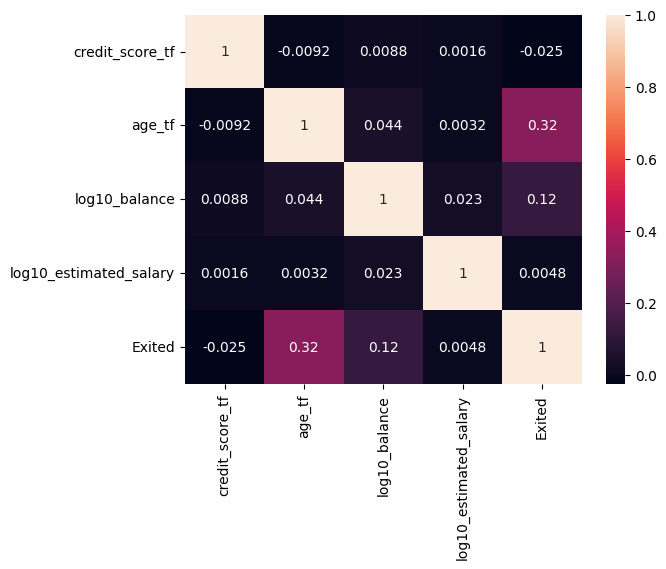

In [ ]:
sns.heatmap(dff[c2].corr(),annot=True)

<Axes: >

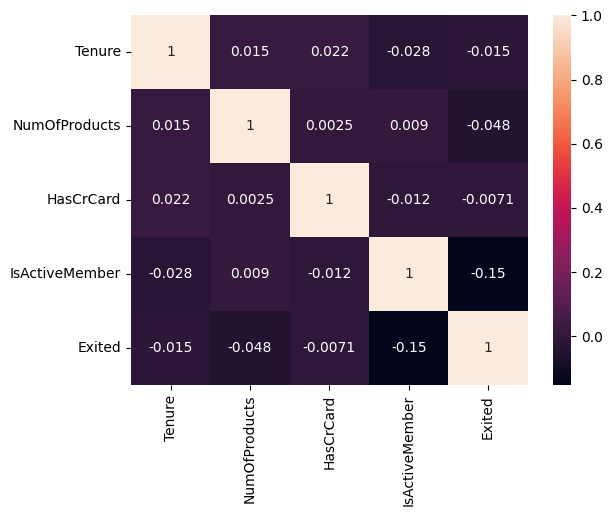

In [ ]:
sns.heatmap(dff[c1].corr(),annot=True)

<Axes: >

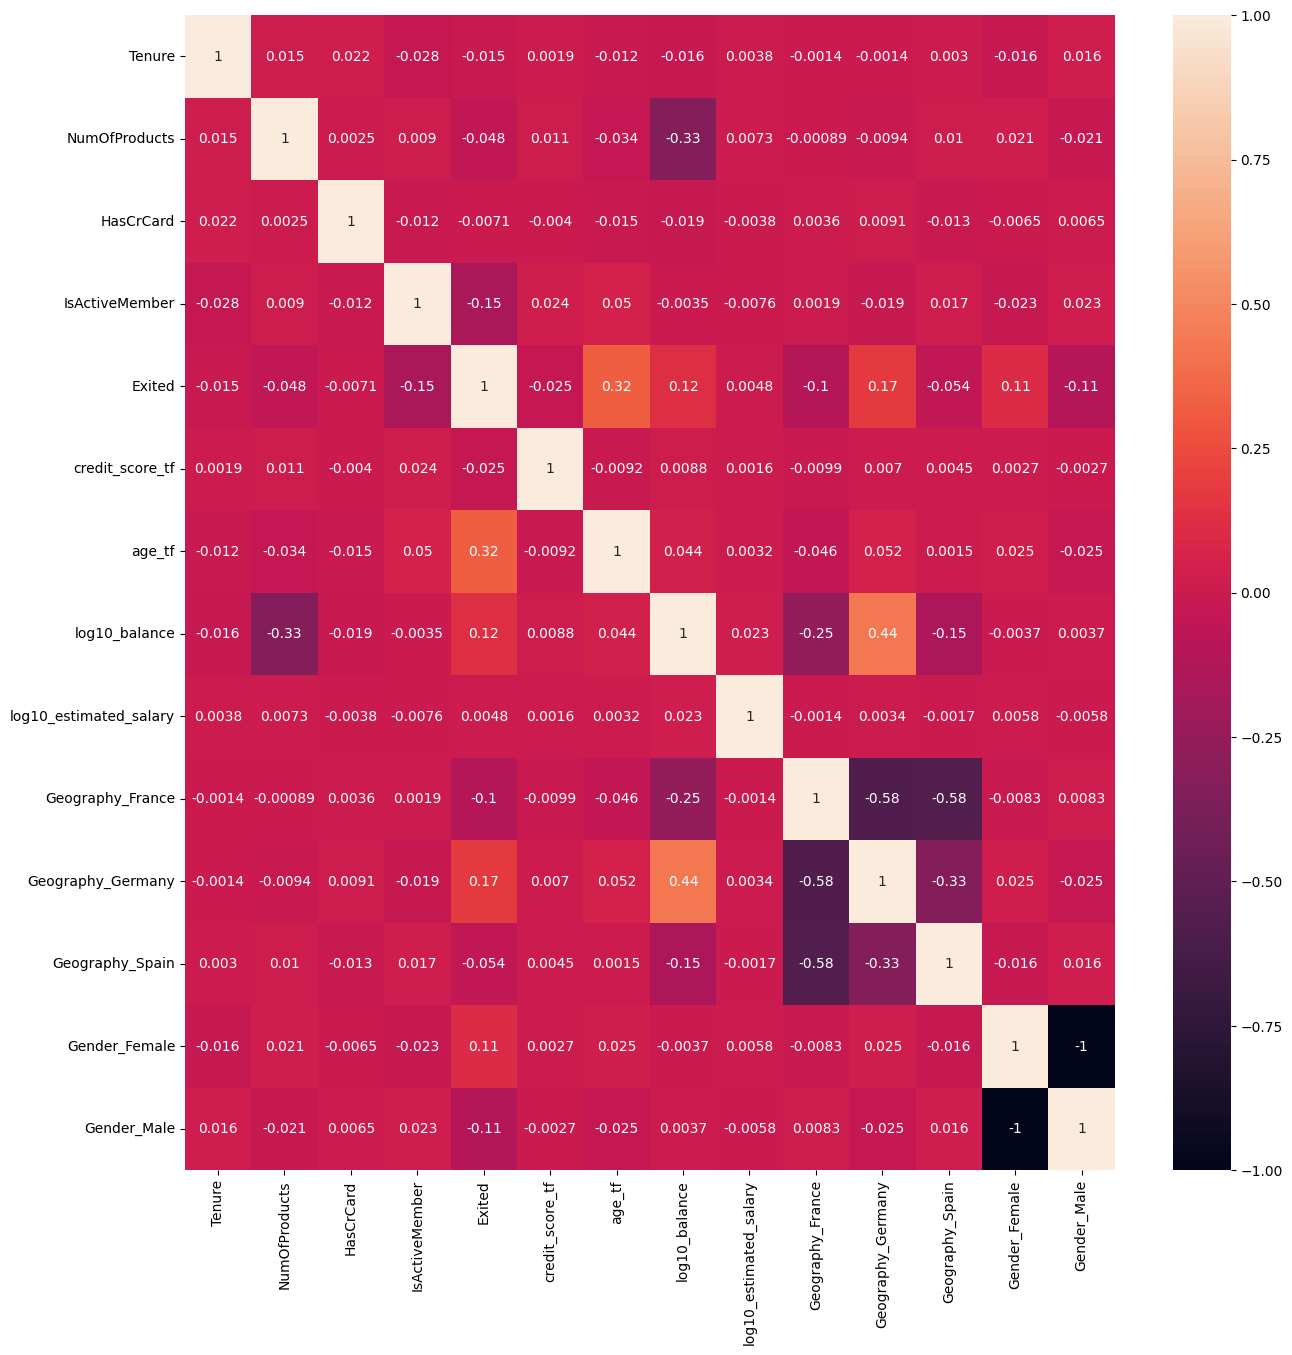

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(dff.corr(),annot=True,ax=ax)

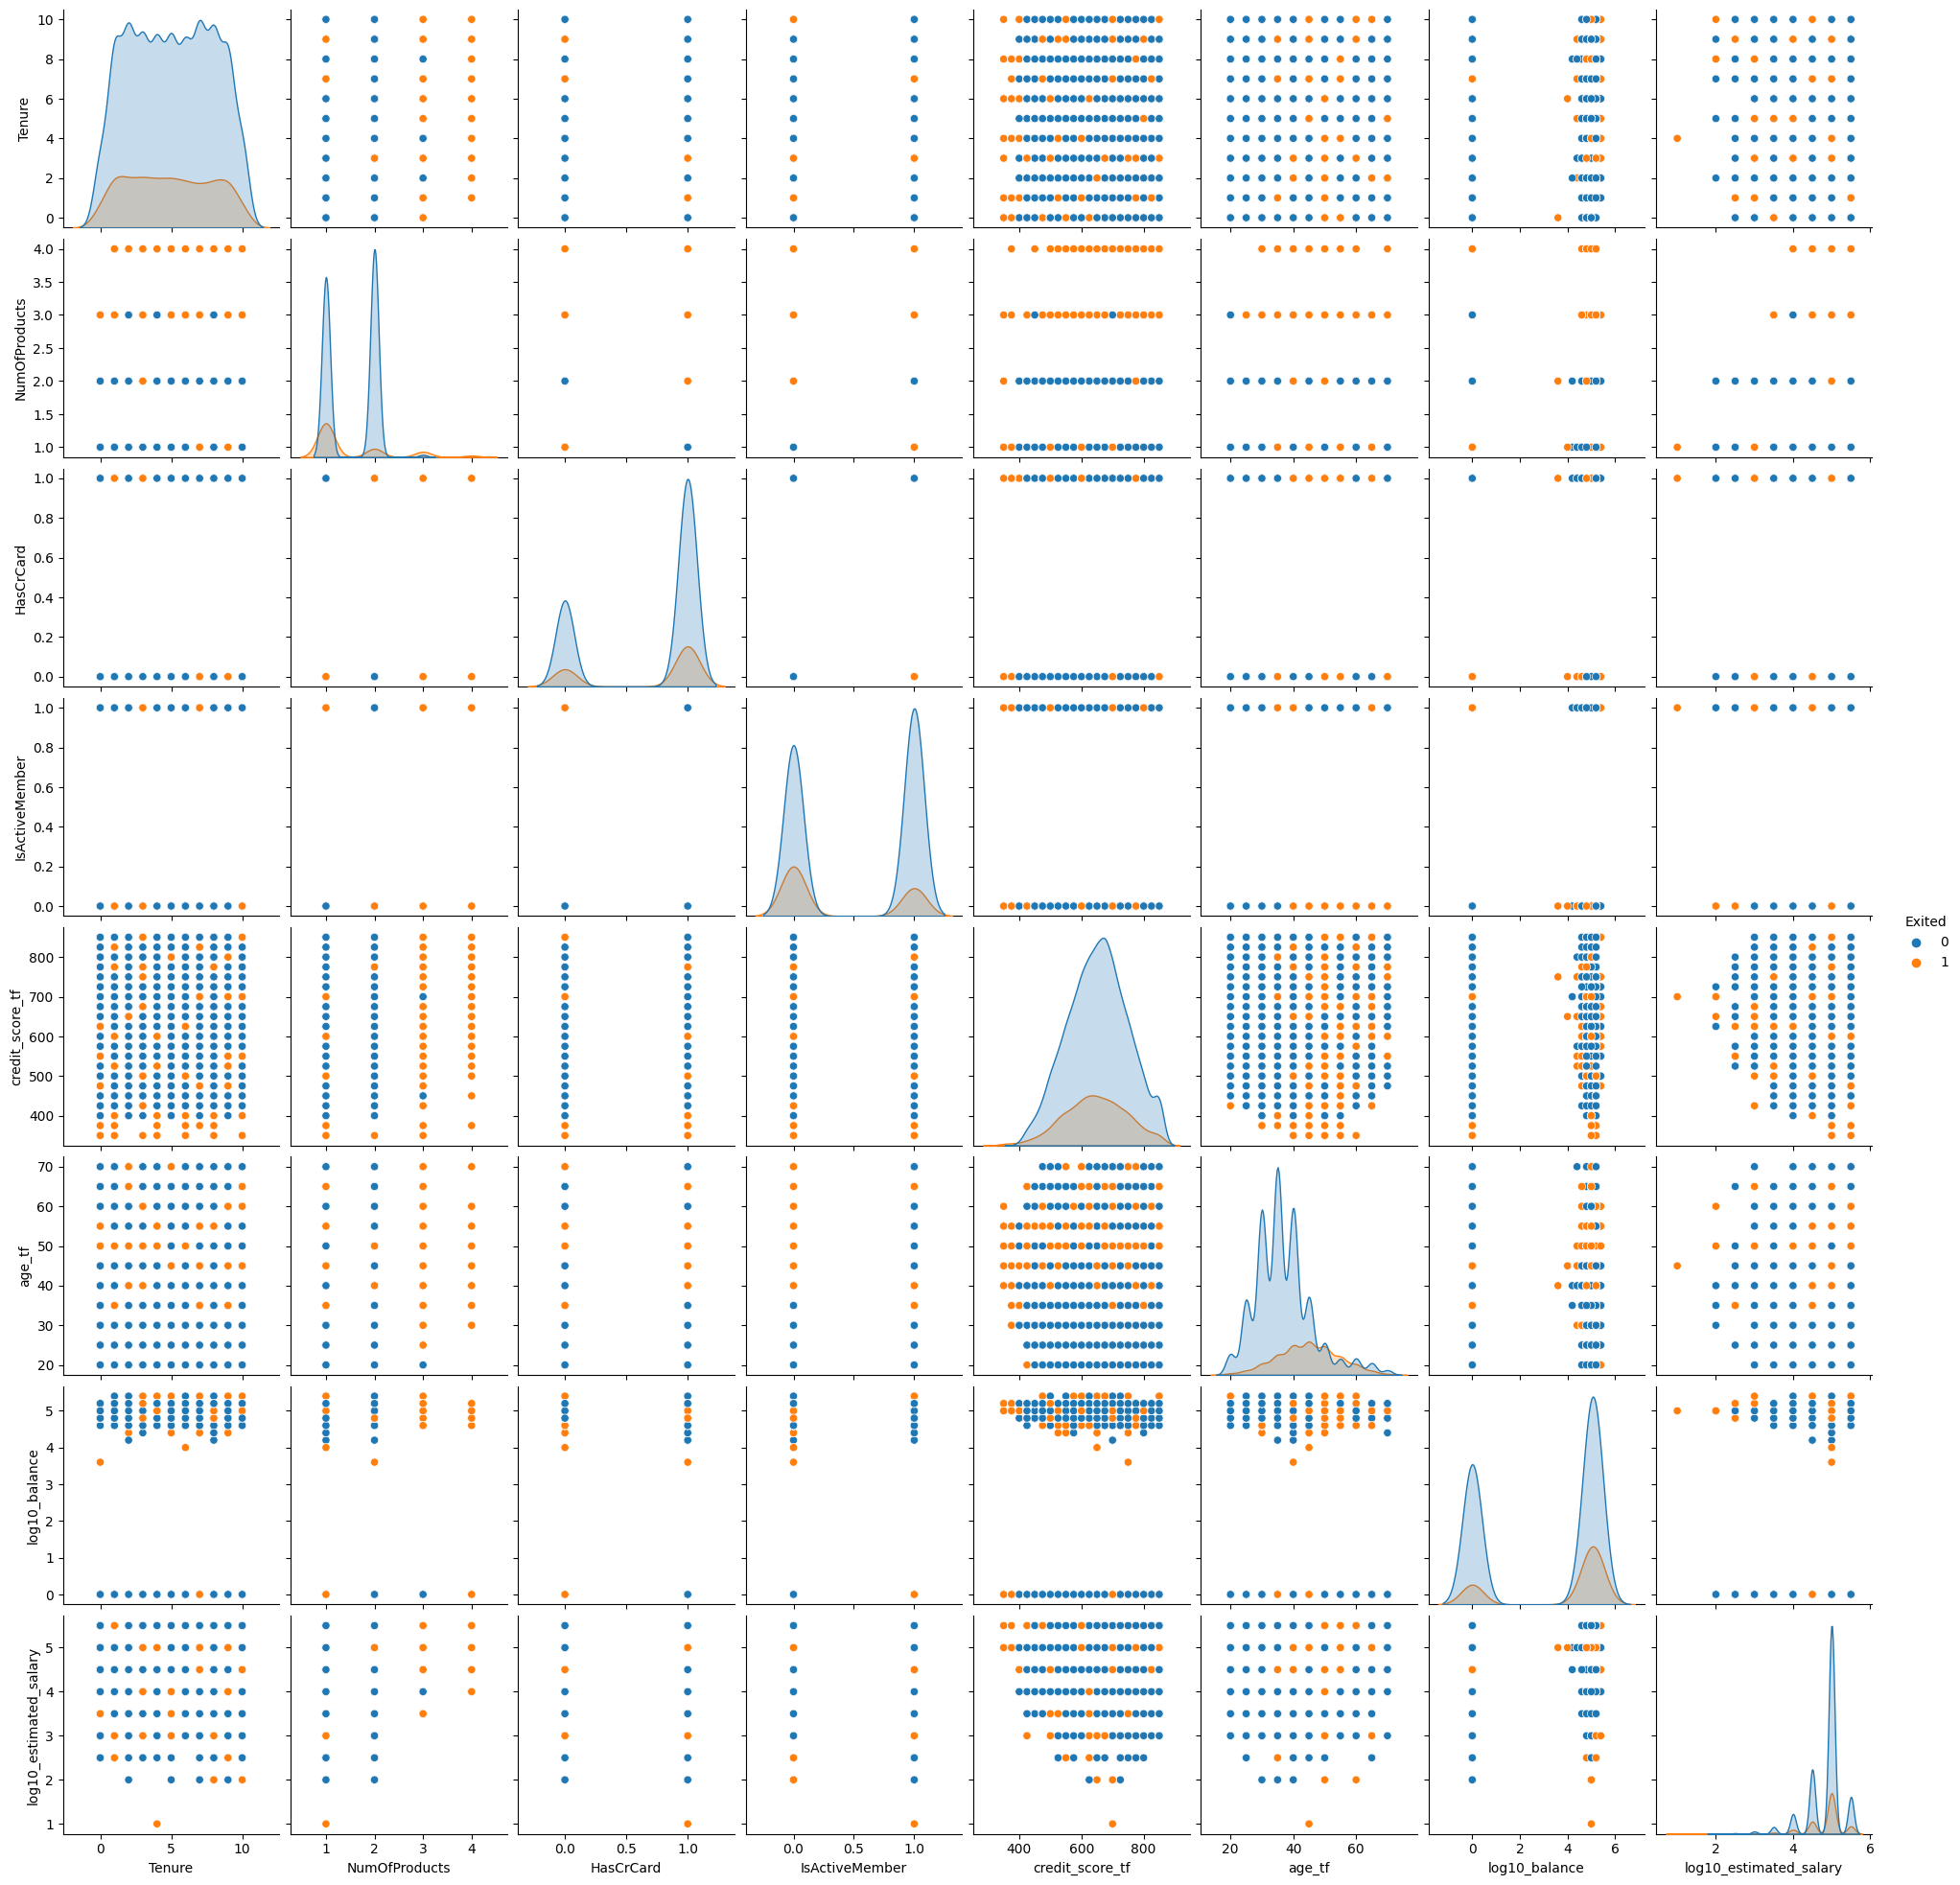

In [ ]:
sns.pairplot(df, hue = 'Exited')

## Tanila's work
Data Scaling, Data Dimensionality Reduction, and Feature Selection.
Use scaling
techniques, such as min-max
normalization or standardization, to
ensure numerical features are on a
similar scale.

In [ ]:
from sklearn.feature_selection import chi2

X = dff[c1].drop('Exited',axis=1)
y = df.Exited

chi_vals = chi2(X, y)
chi = pd.Series(chi_vals[0],index=c1.remove('Exited'))
p = pd.Series(chi_vals[1],index=c1)

<BarContainer object of 4 artists>

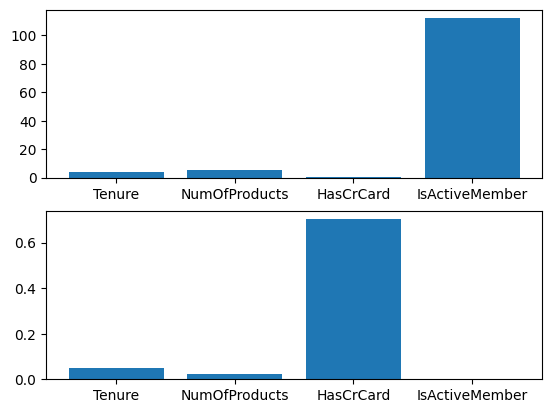

In [ ]:
f, ax = plt.subplots(2,1)
ax[0].bar(x=c1,height=chi)
ax[1].bar(x=c1,height=p)

So we see that if an existing customer has a credit card, he is more likely to exit the bank.

**PCA**

In [ ]:
comp = [3,6,9]
exp_var = {}
for i in comp:
  pca = PCA(n_components=i)
  pca.fit_transform(dff)
  exp_var[i] = pca.explained_variance_ratio_

In [ ]:
exp_var

{3: array([0.57907549, 0.07971578, 0.06999955]),
 6: array([0.57907549, 0.07971578, 0.06999955, 0.06902743, 0.06798552,
        0.03450577]),
 9: array([0.57907549, 0.07971578, 0.06999955, 0.06902743, 0.06798552,
        0.03450577, 0.02526619, 0.02063211, 0.01791688])}

The First principle component is able to explain about 57% of the total variance in the dataset.

## Additional work
Balance the classes to remove class bias. Use advanced resampling techniques and synthetic data generation like SMOTE and ADASYN.

In [ ]:
dff.Exited.value_counts()

0    7841
1    2026
Name: Exited, dtype: int64